## 1-import libraries

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

# determining the goals:
- Sentiment Analysis: Analyze the sentiments of customers based on their reviews.
- Service Quality Assessment: Assess the quality of various services provided by British Airways.
- Route Performance: Examine customer feedback specific to flight routes.
- Aircraft Experience: Understand customer opinions on different aircraft.

In [3]:
data= pd.read_csv(r'C:\Users\Lenovo\Downloads\data projects\data\BA_AirlineReviews.csv')

# data cleaning
- missing value
- who numerical and catogrical
- how many feature and rows

In [4]:
data.head(5)

,Unnamed: 0,OverallRating,ReviewHeader,Name,Datetime,VerifiedReview,ReviewBody,TypeOfTraveller,SeatType,Route,DateFlown,SeatComfort,CabinStaffService,GroundService,ValueForMoney,Recommended,Aircraft,Food&Beverages,InflightEntertainment,Wifi&Connectivity
0,0,1.0,"""Service level far worse then Ryanair""",L Keele,19th November 2023,True,4 Hours before takeoff we received a Mail stat...,Couple Leisure,Economy Class,London to Stuttgart,November 2023,1.0,1.0,1.0,1.0,no,NaN,NaN,NaN,NaN
1,1,3.0,"""do not upgrade members based on status""",Austin Jones,19th November 2023,True,I recently had a delay on British Airways from...,Business,Economy Class,Brussels to London,November 2023,2.0,3.0,1.0,2.0,no,A320,1.0,2.0,2.0
2,2,8.0,"""Flight was smooth and quick""",M A Collie,16th November 2023,False,"Boarded on time, but it took ages to get to th...",Couple Leisure,Business Class,London Heathrow to Dublin,November 2023,3.0,3.0,4.0,3.0,yes,A320,4.0,NaN,NaN
3,3,1.0,"""Absolutely hopeless airline""",Nigel Dean,16th November 2023,True,"5 days before the flight, we were advised by B...",Couple Leisure,Economy Class,London to Dublin,December 2022,3.0,3.0,1.0,1.0,no,NaN,NaN,NaN,NaN
4,4,1.0,"""Customer Service is non existent""",Gaylynne Simpson,14th November 2023,False,"We traveled to Lisbon for our dream vacation, ...",Couple Leisure,Economy Class,London to Lisbon,November 2023,1.0,1.0,1.0,1.0,no,NaN,1.0,1.0,1.0


- The column "Unnamed: 0" **is a result of the sequential numbering during data saving and may not carry any additional value.**
- name is not important

In [5]:
data=data.drop(columns=['Unnamed: 0','Name'],axis=1)

In [6]:
data.shape

(3701, 18)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3701 entries, 0 to 3700
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   OverallRating          3696 non-null   float64
 1   ReviewHeader           3701 non-null   object 
 2   Datetime               3701 non-null   object 
 3   VerifiedReview         3701 non-null   bool   
 4   ReviewBody             3701 non-null   object 
 5   TypeOfTraveller        2930 non-null   object 
 6   SeatType               3699 non-null   object 
 7   Route                  2926 non-null   object 
 8   DateFlown              2923 non-null   object 
 9   SeatComfort            3585 non-null   float64
 10  CabinStaffService      3574 non-null   float64
 11  GroundService          2855 non-null   float64
 12  ValueForMoney          3700 non-null   float64
 13  Recommended            3701 non-null   object 
 14  Aircraft               1922 non-null   object 
 15  Food

In [8]:
data.head(4)

,OverallRating,ReviewHeader,Datetime,VerifiedReview,ReviewBody,TypeOfTraveller,SeatType,Route,DateFlown,SeatComfort,CabinStaffService,GroundService,ValueForMoney,Recommended,Aircraft,Food&Beverages,InflightEntertainment,Wifi&Connectivity
0,1.0,"""Service level far worse then Ryanair""",19th November 2023,True,4 Hours before takeoff we received a Mail stat...,Couple Leisure,Economy Class,London to Stuttgart,November 2023,1.0,1.0,1.0,1.0,no,NaN,NaN,NaN,NaN
1,3.0,"""do not upgrade members based on status""",19th November 2023,True,I recently had a delay on British Airways from...,Business,Economy Class,Brussels to London,November 2023,2.0,3.0,1.0,2.0,no,A320,1.0,2.0,2.0
2,8.0,"""Flight was smooth and quick""",16th November 2023,False,"Boarded on time, but it took ages to get to th...",Couple Leisure,Business Class,London Heathrow to Dublin,November 2023,3.0,3.0,4.0,3.0,yes,A320,4.0,NaN,NaN
3,1.0,"""Absolutely hopeless airline""",16th November 2023,True,"5 days before the flight, we were advised by B...",Couple Leisure,Economy Class,London to Dublin,December 2022,3.0,3.0,1.0,1.0,no,NaN,NaN,NaN,NaN


In [9]:
data.isnull().sum()

OverallRating               5
ReviewHeader                0
Datetime                    0
VerifiedReview              0
ReviewBody                  0
TypeOfTraveller           771
SeatType                    2
Route                     775
DateFlown                 778
SeatComfort               116
CabinStaffService         127
GroundService             846
ValueForMoney               1
Recommended                 0
Aircraft                 1779
Food&Beverages            386
InflightEntertainment    1150
Wifi&Connectivity        3092
dtype: int64

we have alot **missing values** lets to know what can we do 

In [10]:
data.describe()

,OverallRating,SeatComfort,CabinStaffService,GroundService,ValueForMoney,Food&Beverages,InflightEntertainment,Wifi&Connectivity
count,3696.000000,3585.000000,3574.000000,2855.000000,3700.000000,3315.000000,2551.000000,609.000000
mean,4.734307,2.875314,3.254057,2.784238,2.688378,2.713122,2.646021,1.924466
std,3.175306,1.362081,1.489709,1.457058,1.471887,1.437092,1.398509,1.352705
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,1.000000
75%,8.000000,4.000000,5.000000,4.000000,4.000000,4.000000,4.000000,3.000000
max,10.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


- As we've seen, **a rating of 5** indicates that the **customer is very satisfied with the company**  **without (OverallRating) have = 10** 
- while a rating of 1 suggests **dissatisfaction with the company**

In [11]:
data.describe(include='O')


,ReviewHeader,Datetime,ReviewBody,TypeOfTraveller,SeatType,Route,DateFlown,Recommended,Aircraft
count,3701,3701,3701,2930,3699,2926,2923,3701,1922
unique,2684,1820,3692,4,4,1590,112,2,202
top,British Airways customer review,19th January 2015,LHR-SFO. I paid premium economy but upgrade wi...,Couple Leisure,Economy Class,London to Johannesburg,August 2015,no,A320
freq,956,26,2,1000,1927,17,83,2203,366


# EDA

In [12]:
data.head(5)

,OverallRating,ReviewHeader,Datetime,VerifiedReview,ReviewBody,TypeOfTraveller,SeatType,Route,DateFlown,SeatComfort,CabinStaffService,GroundService,ValueForMoney,Recommended,Aircraft,Food&Beverages,InflightEntertainment,Wifi&Connectivity
0,1.0,"""Service level far worse then Ryanair""",19th November 2023,True,4 Hours before takeoff we received a Mail stat...,Couple Leisure,Economy Class,London to Stuttgart,November 2023,1.0,1.0,1.0,1.0,no,NaN,NaN,NaN,NaN
1,3.0,"""do not upgrade members based on status""",19th November 2023,True,I recently had a delay on British Airways from...,Business,Economy Class,Brussels to London,November 2023,2.0,3.0,1.0,2.0,no,A320,1.0,2.0,2.0
2,8.0,"""Flight was smooth and quick""",16th November 2023,False,"Boarded on time, but it took ages to get to th...",Couple Leisure,Business Class,London Heathrow to Dublin,November 2023,3.0,3.0,4.0,3.0,yes,A320,4.0,NaN,NaN
3,1.0,"""Absolutely hopeless airline""",16th November 2023,True,"5 days before the flight, we were advised by B...",Couple Leisure,Economy Class,London to Dublin,December 2022,3.0,3.0,1.0,1.0,no,NaN,NaN,NaN,NaN
4,1.0,"""Customer Service is non existent""",14th November 2023,False,"We traveled to Lisbon for our dream vacation, ...",Couple Leisure,Economy Class,London to Lisbon,November 2023,1.0,1.0,1.0,1.0,no,NaN,1.0,1.0,1.0


<Axes: ylabel='OverallRating'>

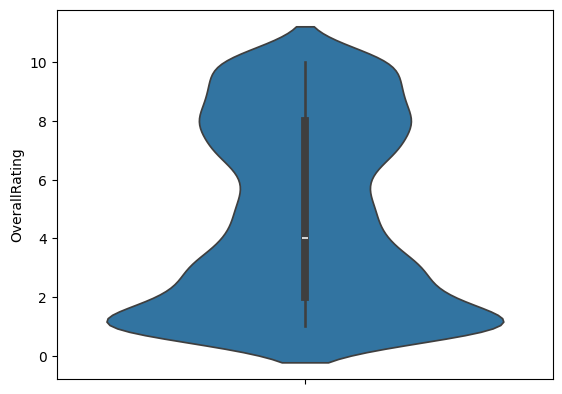

In [13]:
sns.violinplot(y='OverallRating',data=data)

<Axes: xlabel='SeatType', ylabel='count'>

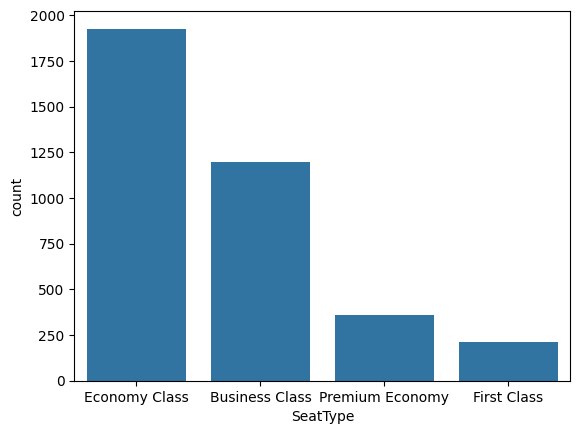

In [14]:
sns.countplot(x='SeatType',data=data)

- Most people book Economy Class.
- And the least book First Class.

Need to know the rating for each class for the airline company.

<Axes: xlabel='SeatType', ylabel='count'>

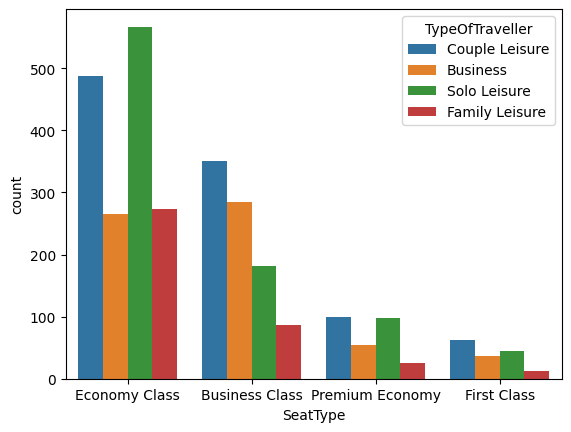

In [15]:
sns.countplot(x='SeatType',hue='TypeOfTraveller',data=data)

- We understood from this data that most people who book Economy Class are of the 'typetraveller' **SoloLeisure**.
- And that most people who booked Business Class are **couple leisure**.
- And the Premium Class has two types: **couple leisure** and solo **leisure**.

Text(0.5, 1.0, 'Count of Overall Ratings for Business ')

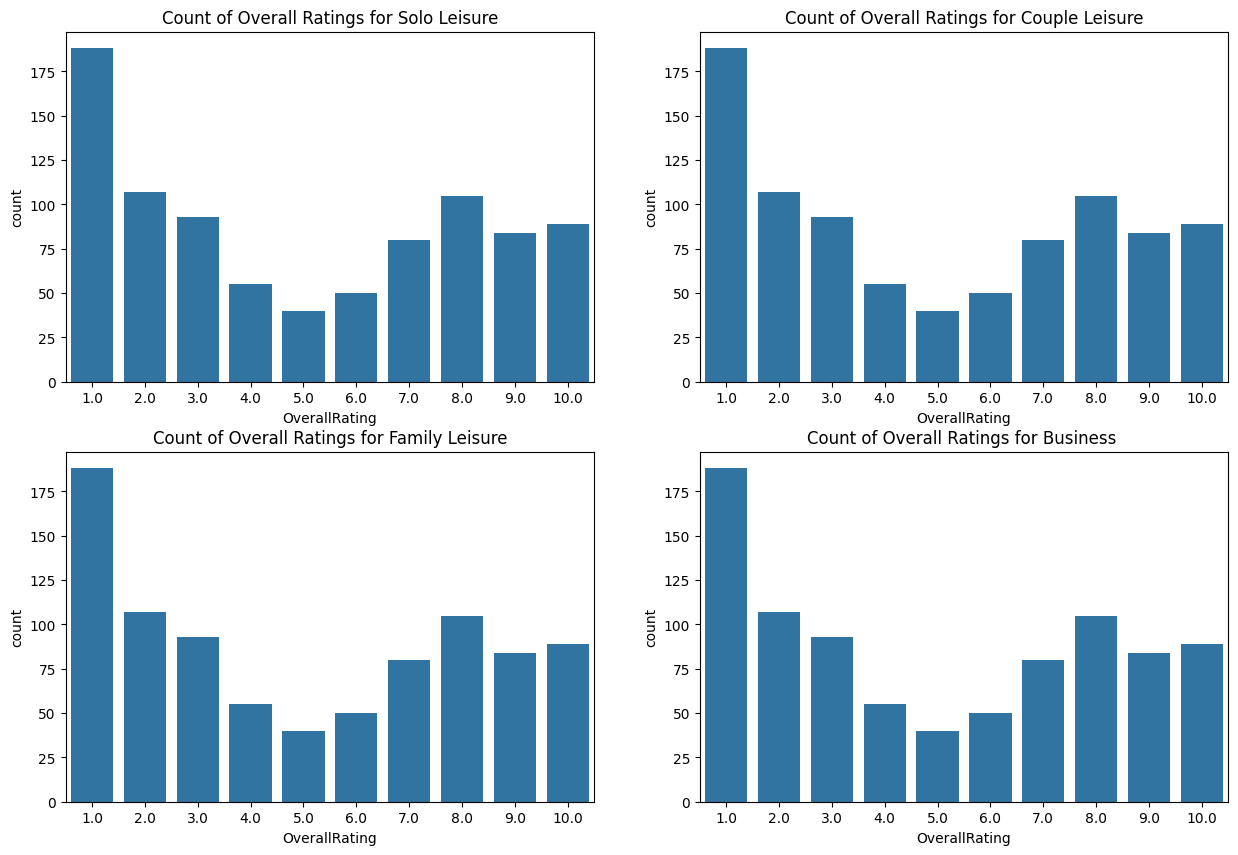

In [16]:
plt.figure(figsize=(15, 10))
plt.subplot2grid((2, 2), (0, 0))
solo_leisure_data = data[data['TypeOfTraveller'] == 'Solo Leisure']
sns.countplot(x='OverallRating', data=solo_leisure_data)
plt.title('Count of Overall Ratings for Solo Leisure')

plt.subplot2grid((2, 2), (0, 1))
Couple_leisure_data = data[data['TypeOfTraveller'] == 'Couple Leisure']
sns.countplot(x='OverallRating', data=solo_leisure_data)
plt.title('Count of Overall Ratings for Couple Leisure')

plt.subplot2grid((2, 2), (1, 0))
Family_leisure_data = data[data['TypeOfTraveller'] == 'Family Leisure']
sns.countplot(x='OverallRating', data=solo_leisure_data)
plt.title('Count of Overall Ratings for Family Leisure')

plt.subplot2grid((2, 2), (1, 1))
Business_leisure_data = data[data['TypeOfTraveller'] == 'Business']
sns.countplot(x='OverallRating', data=solo_leisure_data)
plt.title('Count of Overall Ratings for Business ')

In [17]:
data.head(5)

,OverallRating,ReviewHeader,Datetime,VerifiedReview,ReviewBody,TypeOfTraveller,SeatType,Route,DateFlown,SeatComfort,CabinStaffService,GroundService,ValueForMoney,Recommended,Aircraft,Food&Beverages,InflightEntertainment,Wifi&Connectivity
0,1.0,"""Service level far worse then Ryanair""",19th November 2023,True,4 Hours before takeoff we received a Mail stat...,Couple Leisure,Economy Class,London to Stuttgart,November 2023,1.0,1.0,1.0,1.0,no,NaN,NaN,NaN,NaN
1,3.0,"""do not upgrade members based on status""",19th November 2023,True,I recently had a delay on British Airways from...,Business,Economy Class,Brussels to London,November 2023,2.0,3.0,1.0,2.0,no,A320,1.0,2.0,2.0
2,8.0,"""Flight was smooth and quick""",16th November 2023,False,"Boarded on time, but it took ages to get to th...",Couple Leisure,Business Class,London Heathrow to Dublin,November 2023,3.0,3.0,4.0,3.0,yes,A320,4.0,NaN,NaN
3,1.0,"""Absolutely hopeless airline""",16th November 2023,True,"5 days before the flight, we were advised by B...",Couple Leisure,Economy Class,London to Dublin,December 2022,3.0,3.0,1.0,1.0,no,NaN,NaN,NaN,NaN
4,1.0,"""Customer Service is non existent""",14th November 2023,False,"We traveled to Lisbon for our dream vacation, ...",Couple Leisure,Economy Class,London to Lisbon,November 2023,1.0,1.0,1.0,1.0,no,NaN,1.0,1.0,1.0


i want to know the rate of frist class only

In [18]:
data['SeatType'].value_counts()

SeatType
Economy Class      1927
Business Class     1198
Premium Economy     361
First Class         213
Name: count, dtype: int64

Text(0.5, 1.0, 'Count of Overall Ratings for Business Class')

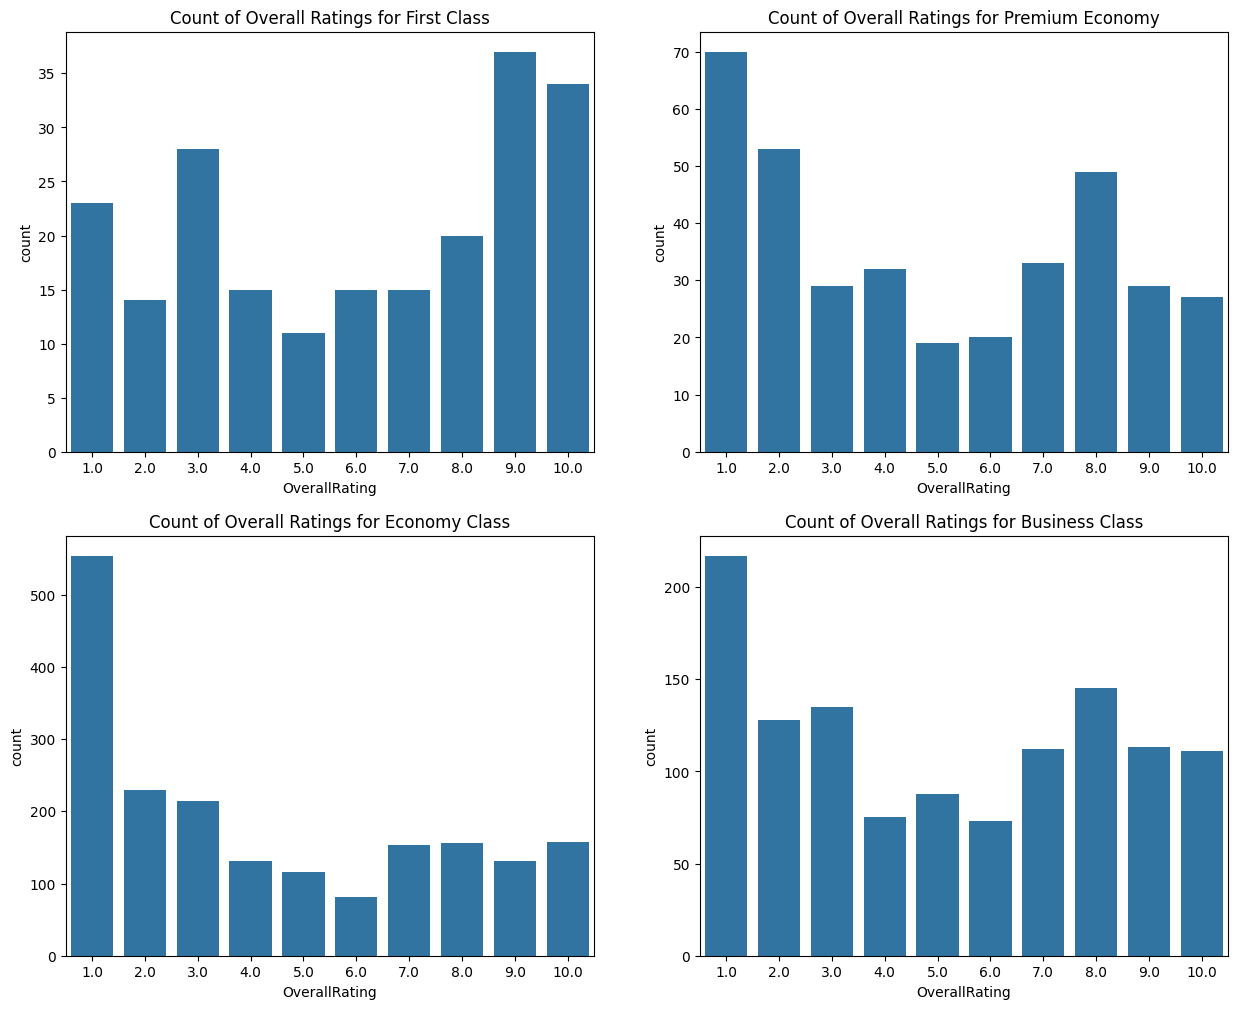

In [19]:
plt.figure(figsize=(15, 12))

plt.subplot2grid((2,2),(0,0))
total=data.loc[(data['SeatType']=='First Class')&(data['OverallRating'])]
sns.countplot(x='OverallRating',data=total)
plt.title('Count of Overall Ratings for First Class')


plt.subplot2grid((2,2),(0,1))
total=data.loc[(data['SeatType']=='Premium Economy')&(data['OverallRating'])]
sns.countplot(x='OverallRating',data=total)
plt.title('Count of Overall Ratings for Premium Economy')


plt.subplot2grid((2,2),(1,0))
total=data.loc[(data['SeatType']=='Economy Class')&(data['OverallRating'])]
sns.countplot(x='OverallRating',data=total)
plt.title('Count of Overall Ratings for Economy Class')


plt.subplot2grid((2,2),(1,1))
total=data.loc[(data['SeatType']=='Business Class')&(data['OverallRating'])]
sns.countplot(x='OverallRating',data=total)
plt.title('Count of Overall Ratings for Business Class')


- The majority of those in **First Class** give them high ratings.
- **the economy class** give them low ratings

## Service Quality Assessment: Assess the quality of various services provided by British Airways.

- SeatComfort
- CabinStaffService
- GroundService
- ValueForMoney
- Food&Beverages
- InflightEntertainment

Text(0.5, 1.0, 'rating of seat comfort')

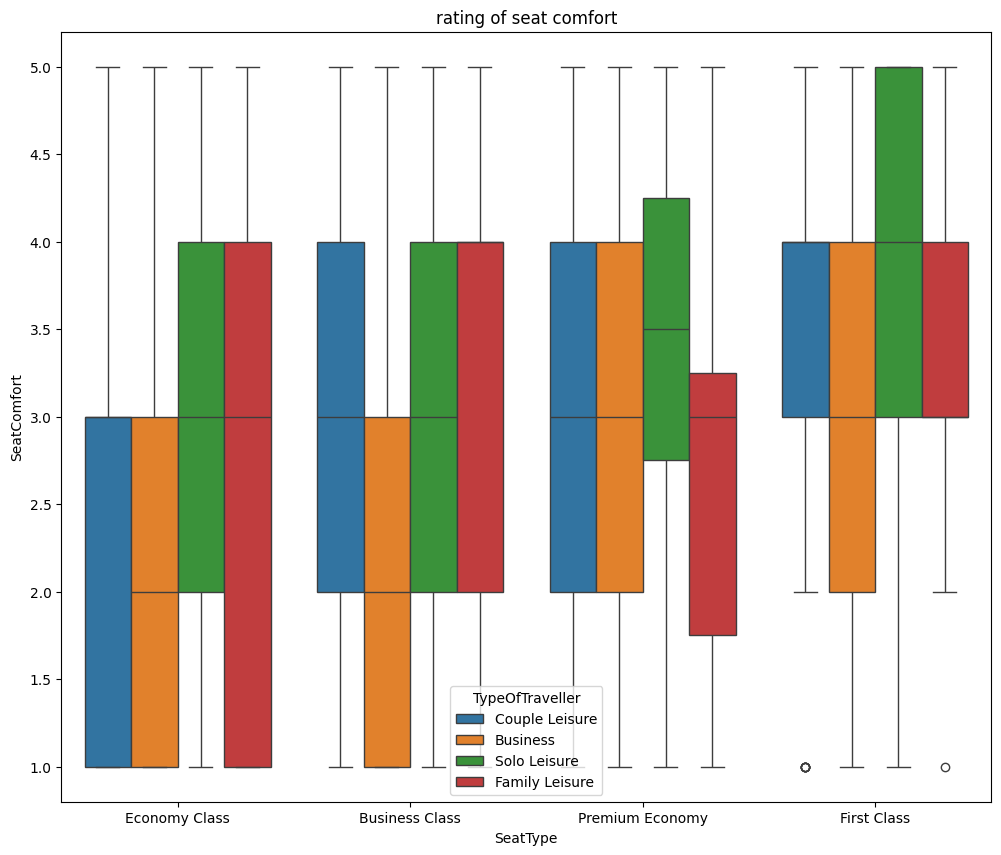

In [20]:
plt.figure(figsize=(12,10))
sns.boxplot(x='SeatType',y='SeatComfort',hue='TypeOfTraveller',data=data).set_title('rating of seat comfort')

It is evident that the seats in **First Class** are much better than the seats in the rest

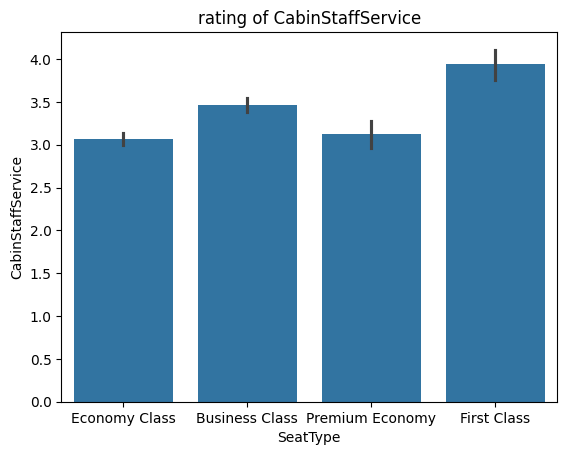

,CabinStaffService
SeatType,
First Class,3.938679
Business Class,3.462852
Premium Economy,3.119318
Economy Class,3.068046


In [21]:
sns.barplot(x='SeatType',y='CabinStaffService',data=data).set_title('rating of CabinStaffService')
plt.show()
data[['SeatType','CabinStaffService']].groupby(['SeatType'],as_index=True).mean().sort_values(by='CabinStaffService',ascending=False)

In [22]:
data.head(5)

,OverallRating,ReviewHeader,Datetime,VerifiedReview,ReviewBody,TypeOfTraveller,SeatType,Route,DateFlown,SeatComfort,CabinStaffService,GroundService,ValueForMoney,Recommended,Aircraft,Food&Beverages,InflightEntertainment,Wifi&Connectivity
0,1.0,"""Service level far worse then Ryanair""",19th November 2023,True,4 Hours before takeoff we received a Mail stat...,Couple Leisure,Economy Class,London to Stuttgart,November 2023,1.0,1.0,1.0,1.0,no,NaN,NaN,NaN,NaN
1,3.0,"""do not upgrade members based on status""",19th November 2023,True,I recently had a delay on British Airways from...,Business,Economy Class,Brussels to London,November 2023,2.0,3.0,1.0,2.0,no,A320,1.0,2.0,2.0
2,8.0,"""Flight was smooth and quick""",16th November 2023,False,"Boarded on time, but it took ages to get to th...",Couple Leisure,Business Class,London Heathrow to Dublin,November 2023,3.0,3.0,4.0,3.0,yes,A320,4.0,NaN,NaN
3,1.0,"""Absolutely hopeless airline""",16th November 2023,True,"5 days before the flight, we were advised by B...",Couple Leisure,Economy Class,London to Dublin,December 2022,3.0,3.0,1.0,1.0,no,NaN,NaN,NaN,NaN
4,1.0,"""Customer Service is non existent""",14th November 2023,False,"We traveled to Lisbon for our dream vacation, ...",Couple Leisure,Economy Class,London to Lisbon,November 2023,1.0,1.0,1.0,1.0,no,NaN,1.0,1.0,1.0


staffService :                  CabinStaffService
SeatType                          
First Class               3.938679
Business Class            3.462852
Premium Economy           3.119318
Economy Class             3.068046
staffService :                  GroundService
SeatType                      
First Class           3.160256
Business Class        2.931818
Premium Economy       2.904059
Economy Class         2.642534


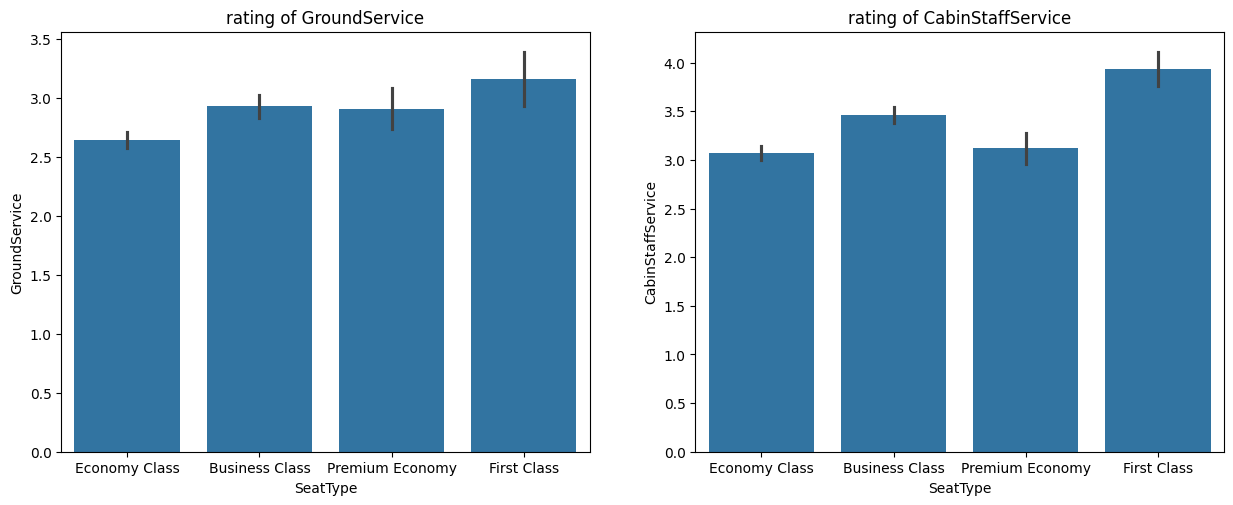

In [23]:
plt.figure(figsize=(15, 12))

plt.subplot2grid((2,2),(0,0))
sns.barplot(x='SeatType',y='GroundService',data=data).set_title('rating of GroundService')

plt.subplot2grid((2,2),(0,1))
sns.barplot(x='SeatType',y='CabinStaffService',data=data).set_title('rating of CabinStaffService')

staffService=data[['SeatType','CabinStaffService']].groupby(['SeatType'],as_index=True).mean().sort_values(by='CabinStaffService',ascending=False)
GroundService=data[['SeatType','GroundService']].groupby(['SeatType'],as_index=True).mean().sort_values(by='GroundService',ascending=False)
print(f'staffService : {staffService}')
print(f'staffService : {GroundService}')

"It seems that both **CabinStaffService** and **GroundService** receive high ratings from all passengers."

<Axes: xlabel='Food&Beverages', ylabel='count'>

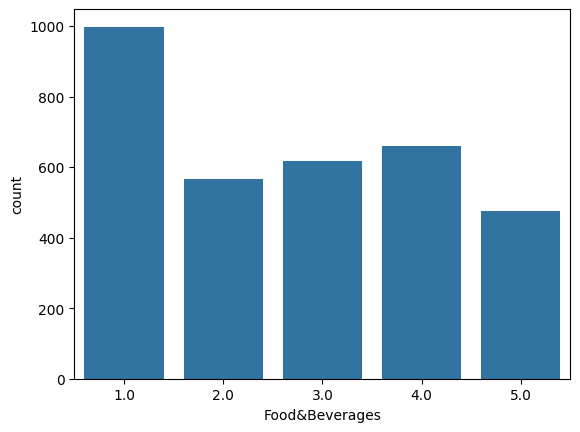

In [24]:
sns.countplot(x='Food&Beverages',data=data)

<Axes: xlabel='SeatType', ylabel='Food&Beverages'>

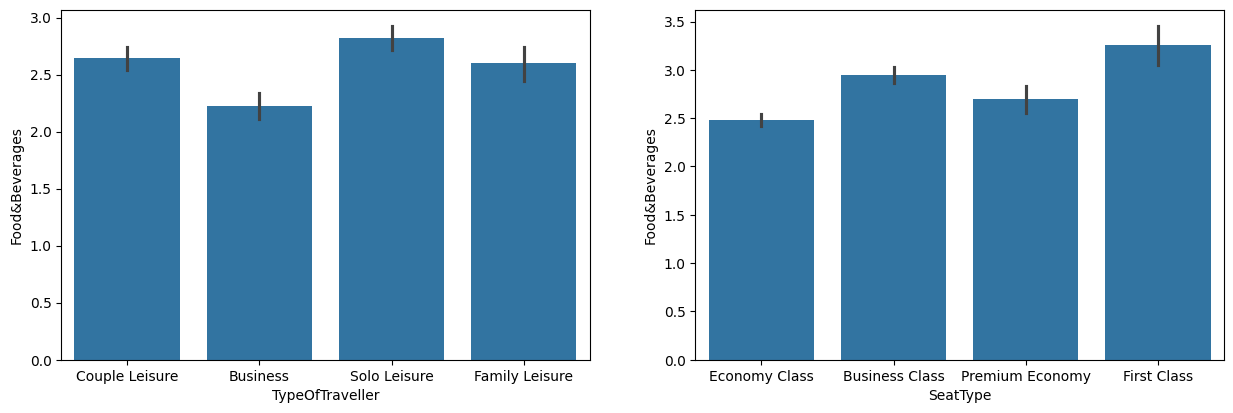

In [25]:
plt.figure(figsize=(15,10))
plt.subplot2grid((2,2),(0,0))
sns.barplot(x='TypeOfTraveller',y='Food&Beverages',data=data)

plt.subplot2grid((2,2),(0,1))
sns.barplot(x='SeatType',y='Food&Beverages',data=data)

<Axes: xlabel='SeatType', ylabel='Food&Beverages'>

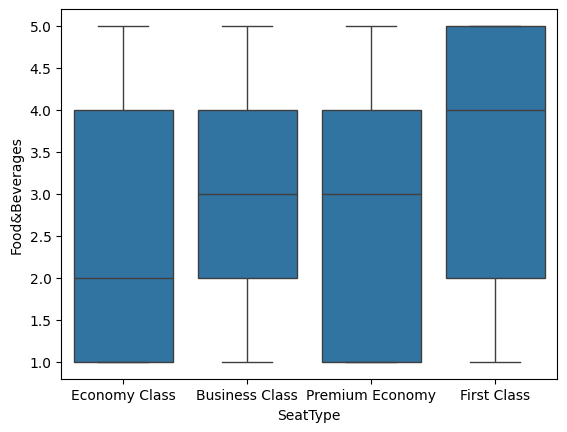

In [26]:
sns.boxplot(x='SeatType',y='Food&Beverages',data=data)

- As we can see, ***Business Class*** and **Premium Class** have similar ratings. 
- **First Class** receives the highest rating for food.
 - **Economy Class** has the lowest food rating.

 - There should be more attention given to **Economy Class** as they have the highest number of passengers, and their ratings are low.

<Axes: xlabel='Recommended', ylabel='count'>

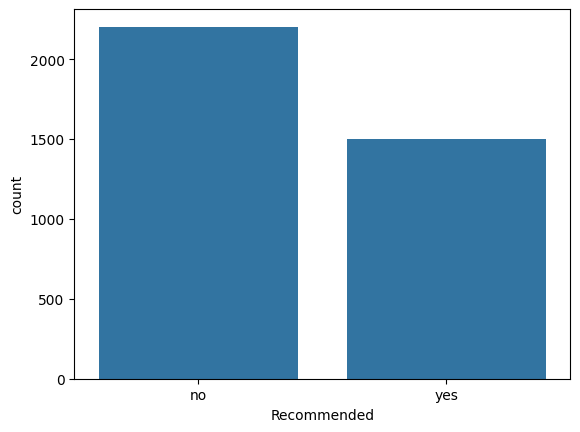

In [27]:
sns.countplot(x='Recommended',data=data)

"The largest number does not favor traveling on this airline."

Let's see who does not prefer to travel and who does prefer.

In [28]:
data[['Recommended','OverallRating']].groupby(['Recommended'],as_index=True).count().sort_values(by='OverallRating',ascending=False)


,OverallRating
Recommended,
no,2198
yes,1498


In [29]:
da_yes=data[data['Recommended']=='yes']
da_no=data[data['Recommended']=='no']
da_yes['SeatType'].value_counts()

SeatType
Economy Class      697
Business Class     549
Premium Economy    147
First Class        105
Name: count, dtype: int64

In [30]:
da_no['SeatType'].value_counts()

SeatType
Economy Class      1230
Business Class      649
Premium Economy     214
First Class         108
Name: count, dtype: int64

Text(0.5, 1.0, 'not recomend')

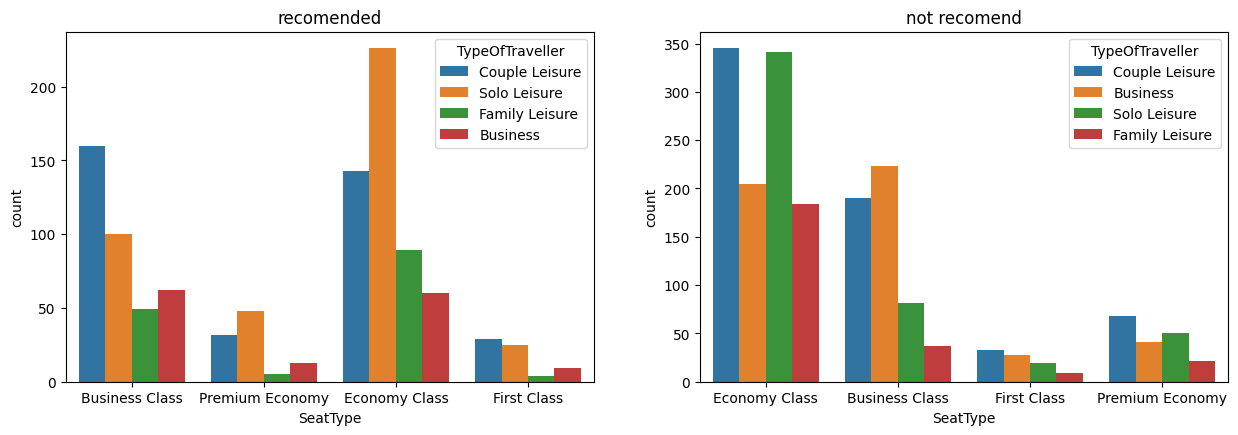

In [31]:
plt.figure(figsize=(15,10))
plt.subplot2grid((2,2),(0,0))
sns.countplot(x='SeatType',hue='TypeOfTraveller',data=da_yes).set_title('recomended')

plt.subplot2grid((2,2),(0,1))
sns.countplot(x='SeatType',hue='TypeOfTraveller',data=da_no).set_title('not recomend')

we can use the datetime to know which 

In [32]:
date_format = "%d %B %Y"
data['Datetime'] = pd.to_datetime(data['Datetime'].str.replace(r'th|st|nd|rd', '', regex=True), format=date_format, errors='coerce')

In [33]:
data['month'] = (data['Datetime']).dt.month
data['year']=(data['Datetime']).dt.year

Text(0.5, 1.0, 'rating by year')

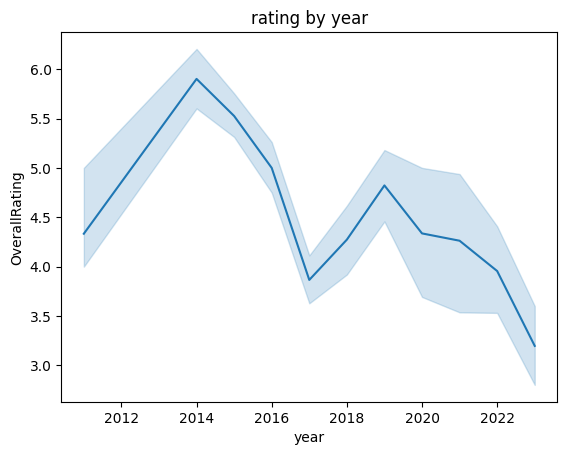

In [34]:
sns.lineplot(x='year',y='OverallRating',data=data).set_title('rating by year')

Text(0.5, 1.0, 'rating months of 2014')

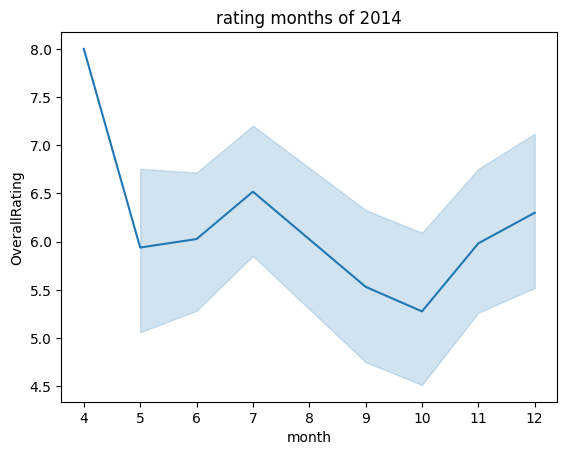

In [35]:
month_2014=data[data['year']==2014]
sns.lineplot(x='month',y='OverallRating',data=month_2014).set_title('rating months of 2014')

- The year that received the highest evaluation is **2014-2015**.
- The highest month is **April and julay** in the year 2014.

In [36]:
date_format = "%B %Y"
data['DateFlown'] = pd.to_datetime(data['DateFlown'].str.replace(r'th|st|nd|rd', '', regex=True), format=date_format, errors='coerce')

In [37]:
data['month_flown'] = (data['DateFlown']).dt.month
data['year_flown']=(data['DateFlown']).dt.year

In [38]:
data=data.drop(columns=['Datetime','DateFlown'],axis=1)

Text(0.5, 1.0, 'rating by year')

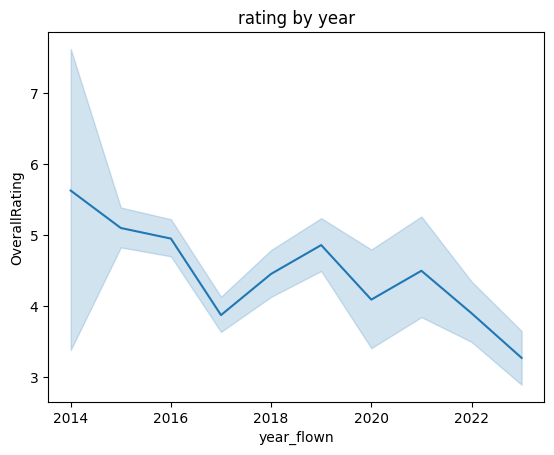

In [39]:
sns.lineplot(x='year_flown',y='OverallRating',data=data).set_title('rating by year')

Text(0.5, 1.0, 'rating months of 2014')

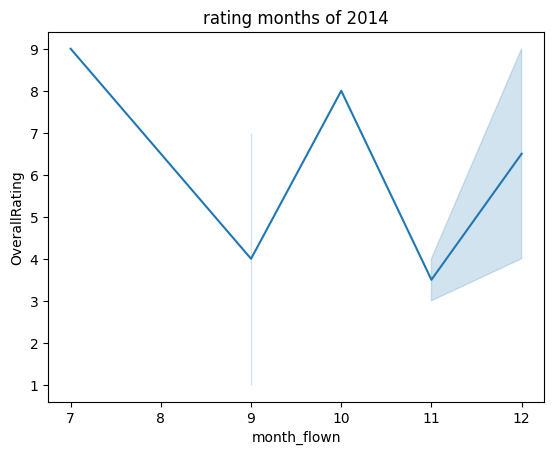

In [40]:
month_2014=data[data['year_flown']==2014]
sns.lineplot(x='month_flown',y='OverallRating',data=month_2014).set_title('rating months of 2014')

In [41]:
data['Aircraft'].value_counts()

Aircraft
A320                     366
Boeing 777               272
Boeing 747-400           182
A380                     166
Boeing 777-200           125
                        ... 
A319 / Boeing 787-9        1
Boeing 747-400 / A319      1
A320 / Boeing 747-400      1
Boeing 777 / A380          1
Airbus 319                 1
Name: count, Length: 202, dtype: int64

In [42]:
data['Aircraft'].isnull().sum()

1779

In [43]:
data['Aircraft'].nunique()

202

- As we have seen, there are many airplanes that are difficult to analyze, and knowing the best airplanes can be challenging.
- However, we can know the **top 20 used airplanes** and find out customers' opinions about them.

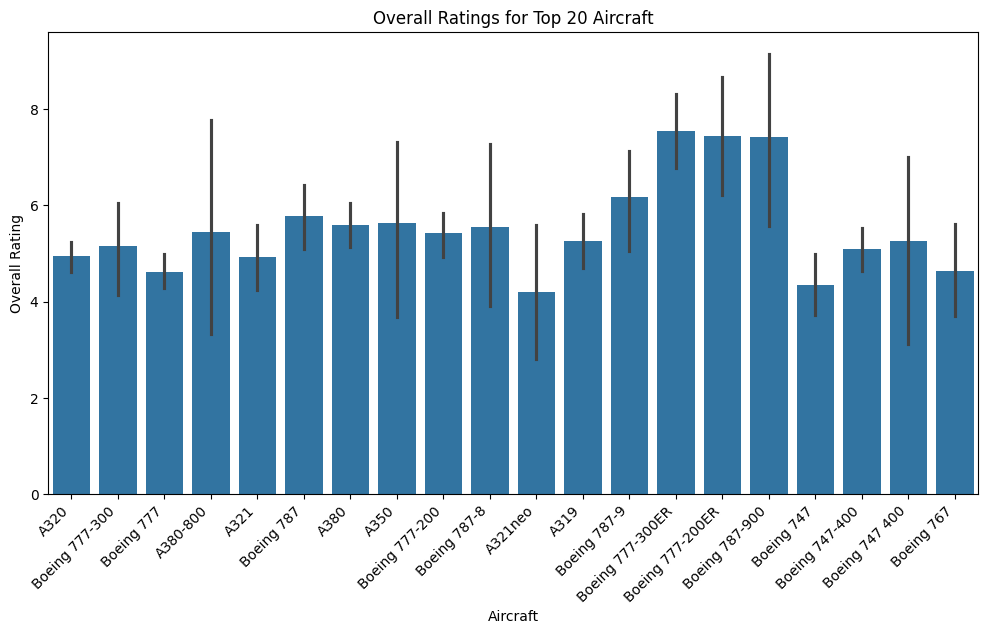

In [44]:
aircraft_column = data["Aircraft"]
overall_rating_column = data["OverallRating"]

top_20_aircraft = aircraft_column.value_counts().head(20).index

filtered_data = data[data["Aircraft"].isin(top_20_aircraft)]

plt.figure(figsize=(12, 6))
sns.barplot(x=filtered_data['Aircraft'],y=filtered_data['OverallRating'])
plt.title('Overall Ratings for Top 20 Aircraft')
plt.xlabel('Aircraft')
plt.ylabel('Overall Rating')
plt.xticks(rotation=45, ha='right');

In [45]:
def plot_count(df: pd.core.frame.DataFrame, col_list: list, title_name: str='Train') -> None:

    f, ax = plt.subplots(len(col_list), 2, figsize=(12, 5))
    plt.subplots_adjust(wspace=0.3)

    for col in col_list:

        # Computing value counts for each category in the column
        s1 = df[col].value_counts()
        N = len(s1)

        outer_sizes = s1
        inner_sizes = s1/N

        # Colors for the outer and inner parts of the pie chart
        outer_colors = ['#FF6347', '#20B2AA']
        inner_colors = ['#FFA07A', '#40E0D0']

        # Creating outer pie chart
        ax[0].pie(
            outer_sizes, colors=outer_colors, 
            labels=s1.index.tolist(), 
            startangle=90, frame=True, radius=1.2, 
            explode=([0.05]*(N-1) + [.2]),
            wedgeprops={'linewidth': 1, 'edgecolor': 'white'}, 
            textprops={'fontsize': 14, 'weight': 'bold'},
            shadow=True
        )
        ax[0].pie(
            inner_sizes, colors=inner_colors,
            radius=0.8, startangle=90,
            autopct='%1.f%%', explode=([.1]*(N-1) + [.2]),
            pctdistance=0.8, textprops={'size': 13, 'weight': 'bold', 'color': 'black'},
            shadow=True
        )

        # Creating a white circle at the center
        center_circle = plt.Circle((0,0), .5, color='black', fc='white', linewidth=0)
        ax[0].add_artist(center_circle)

        # Barplot for the count of each category in the column
        sns.barplot(
            x=s1, y=s1.index, ax=ax[1],
            palette='coolwarm', orient='horizontal'
        )

        # Customizing the bar plot
        ax[1].spines['top'].set_visible(False)
        ax[1].spines['right'].set_visible(False)
        ax[1].tick_params(axis='x', which='both', bottom=False, labelbottom=False)
        ax[1].set_ylabel('')  # Remove y label
        for i, v in enumerate(s1):
            ax[1].text(v, i+0.1, str(v), color='black', fontweight='bold', fontsize=14)

        # Adding labels and title
        plt.setp(ax[1].get_yticklabels(), fontweight="bold")
        plt.setp(ax[1].get_xticklabels(), fontweight="bold")
        ax[1].set_xlabel(col, fontweight="bold", color='black', fontsize=14)

    # Setting a global title for all subplots
    f.suptitle(f'{title_name} Dataset Distribution of {col}', fontsize=20, fontweight='bold', y=1.05)

    # Adjusting the spacing between the plots
    plt.tight_layout()    
    plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_6064\3883518142.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


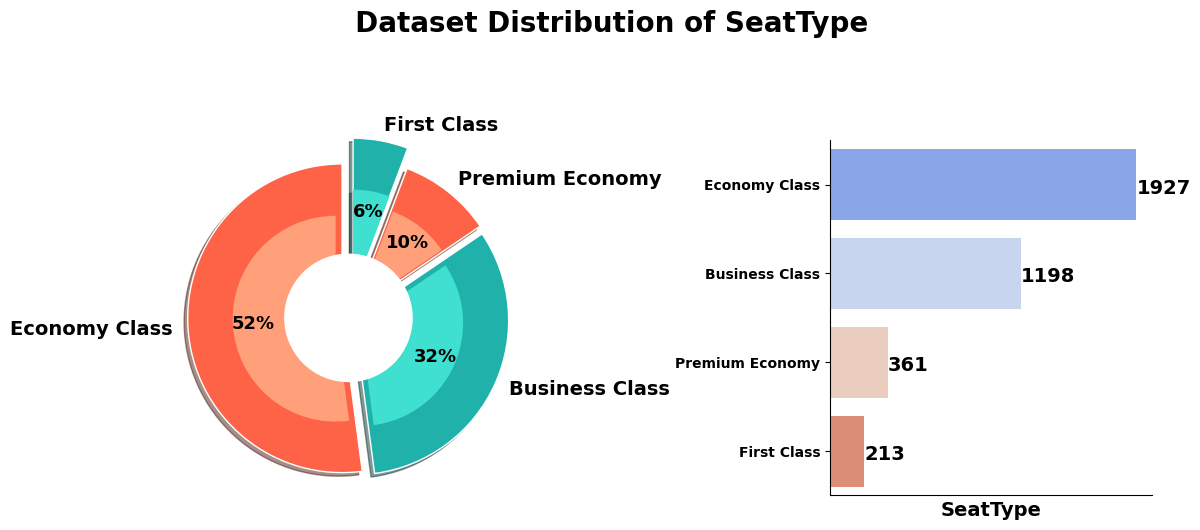

In [46]:
plot_count(data, ['SeatType'], ' ')
